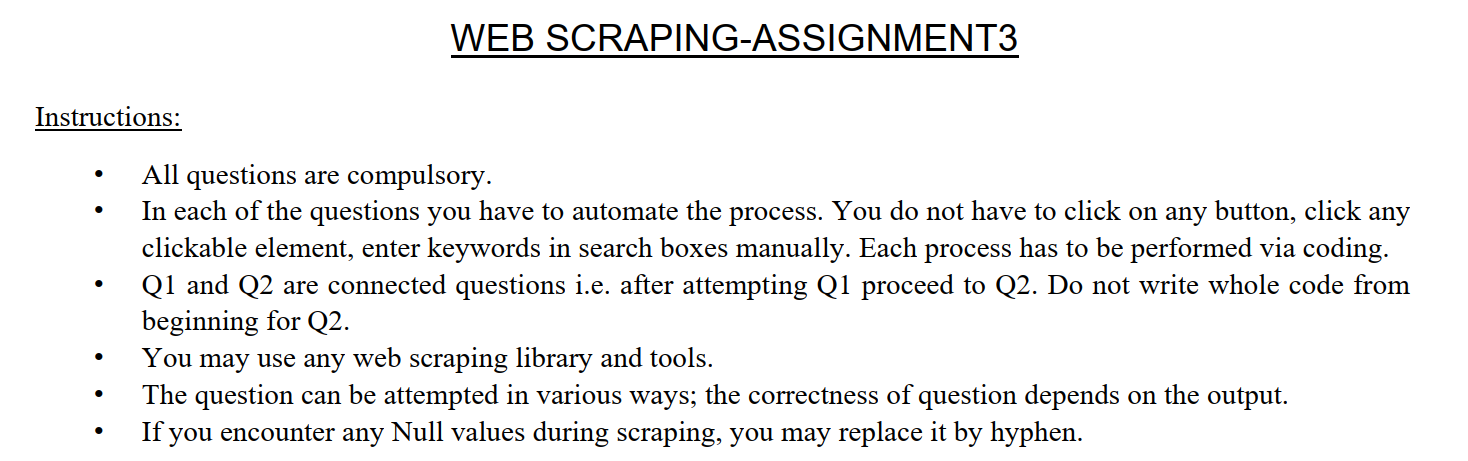

## Importing the required libraries

In [626]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

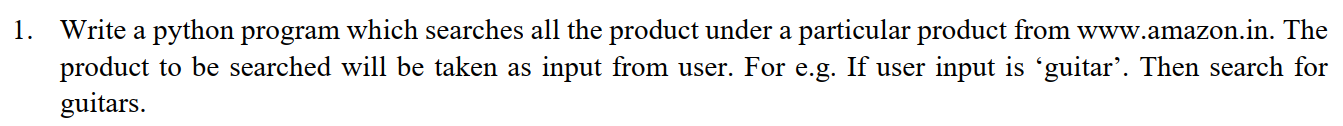

## (1) Launching Chrome

In [99]:
driver1=webdriver.Chrome()

## Launching www.amazon.in

In [100]:
driver1.get('https://www.amazon.in')
driver1.maximize_window()

## Searching "DATA SCIENCE BOOKS"

In [102]:
# To click the serach icon
search=driver1.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
search.send_keys('Data Science Books')

In [103]:
search_icon=driver1.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_icon.click()

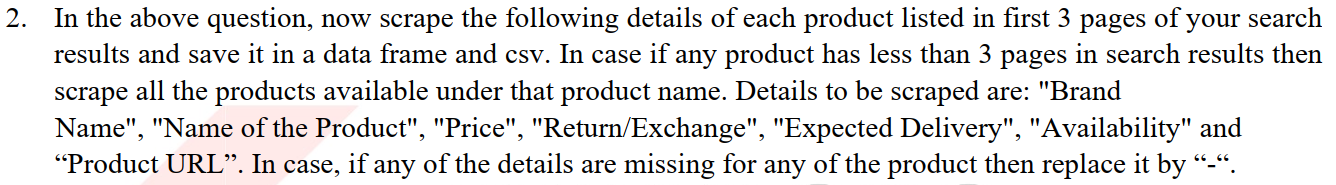

## (2) Scraping BOOK DETAILS of the books on "DATA SCIENCE" from first 3 pages

In [140]:
Details=[]
start=0
end=3
for page in range(start,end):
    details=driver1.find_elements(By.XPATH,'//div[@class="a-section a-spacing-none puis-padding-right-small s-title-instructions-style"]')
    for i in details:
        Details.append(i.text)
    next=driver1.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    next.click()
    time.sleep(10)
Details

["Sponsored\nDATA SCIENCE: 3 Book in 1 - Beginner's Guide to Learn the Realms Of Data Science + Tips and Tricks to Learn The Theories Effectively+ Advanced Method Strategies For Business\nby William Vance | 10 June 2020",
 'Sponsored\nData Science for Business 2019 (2 BOOKS IN 1): Master Data Analytics & Machine Learning with Optimized Marketing Strategies (Artificial Intelligence, Neural Networks, Algorithms & Predictive Modelling\nby Riley Adams and Matt Henderson | 12 May 2019',
 'Data Science From Scratch: First Principles with Python, Second Edition (Greyscale Indian Edition)\nby Joel Grus | 5 May 2019',
 'Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python, Second Edition (Greyscale Indian Edition)\nby Peter Bruce, Andrew Bruce, et al. | 15 June 2020',
 'Industry 4.0, AI, and Data Science: Research Trends and Challenges (Demystifying Technologies for Computational Excellence)\nby Vikram Bali, Kakoli Banerjee, et al. | 1 July 2021',
 'Machine Learni

In [141]:
Book=[]
for i in Details:
    
    Book.append(i.replace('Sponsored\n',''))
Book

["DATA SCIENCE: 3 Book in 1 - Beginner's Guide to Learn the Realms Of Data Science + Tips and Tricks to Learn The Theories Effectively+ Advanced Method Strategies For Business\nby William Vance | 10 June 2020",
 'Data Science for Business 2019 (2 BOOKS IN 1): Master Data Analytics & Machine Learning with Optimized Marketing Strategies (Artificial Intelligence, Neural Networks, Algorithms & Predictive Modelling\nby Riley Adams and Matt Henderson | 12 May 2019',
 'Data Science From Scratch: First Principles with Python, Second Edition (Greyscale Indian Edition)\nby Joel Grus | 5 May 2019',
 'Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python, Second Edition (Greyscale Indian Edition)\nby Peter Bruce, Andrew Bruce, et al. | 15 June 2020',
 'Industry 4.0, AI, and Data Science: Research Trends and Challenges (Demystifying Technologies for Computational Excellence)\nby Vikram Bali, Kakoli Banerjee, et al. | 1 July 2021',
 'Machine Learning for Data Science Ha

## Scraping PRICE name of the books on "DATA SCIENCE" from first 3 pages

In [143]:
Price=[]
start=0
end=3
for page in range(start,end):
    price=driver1.find_elements(By.XPATH,'//div[@class="a-section a-spacing-none a-spacing-top-micro puis-price-instructions-style"]')
    for i in price:
        Price.append(i.text)
    next=driver1.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    next.click()
    time.sleep(10)
Price


['Paperback\n₹2,368 M.R.P:\n₹3,440 (31% off)\nSave 3% with coupon',
 'Hardcover\n₹2,333 M.R.P:\n₹2,640 (12% off)\nSave 3% with coupon',
 'Paperback\n₹1,575',
 'Paperback\n₹1,475',
 'Hardcover\n₹7,800 M.R.P:\n₹13,650 (43% off)',
 'Hardcover\n₹13,630 M.R.P:\n₹20,000 (32% off)',
 'Hardcover\n₹9,363 M.R.P:\n₹13,650 (31% off)',
 'Hardcover\n₹5,040',
 'Paperback\n₹299 M.R.P:\n₹399 (25% off)',
 'Paperback\n₹1,350',
 'Paperback\n₹485 M.R.P:\n₹550 (12% off)',
 'Paperback\n₹360',
 'Hardcover\n₹9,125',
 'Paperback\n₹1,750',
 'Hardcover\n₹4,089 M.R.P:\n₹4,518 (9% off)',
 'Paperback\n₹989 M.R.P:\n₹999 (1% off)',
 'Paperback\n₹1,500',
 'Paperback\n₹613 M.R.P:\n₹750 (18% off)',
 'Paperback\n₹5,799 M.R.P:\n₹6,540 (11% off)',
 'Paperback\n₹1,449 M.R.P:\n₹1,999 (28% off)',
 'Hardcover\n₹2,375 M.R.P:\n₹2,725 (13% off)\nSave 3% with coupon',
 'Hardcover\n₹1,036 M.R.P:\n₹2,000 (48% off)\nSave 3% with coupon',
 'Paperback\n₹811',
 'Paperback\n₹989 M.R.P:\n₹999 (1% off)',
 'Kindle Edition\n₹0\nFree with Kind

In [144]:
import re

# Define a regular expression pattern to match the price values
price_pattern = re.compile(r'₹([\d,]+)')

# Extract price values and replace non-price items with None
extracted_prices = [match.group(1) if (match := price_pattern.search(item)) else None for item in Price]

# Print the extracted prices
print(extracted_prices)


['2,368', '2,333', '1,575', '1,475', '7,800', '13,630', '9,363', '5,040', '299', '1,350', '485', '360', '9,125', '1,750', '4,089', '989', '1,500', '613', '5,799', '1,449', '2,375', '1,036', '811', '989', '0', '379', '10,750', '0', '675', '247', '175', '842', '675', '869', '300', '299', '600', '370', '5,225', '435', '372', '3,720', '871', '13,822', '2,464', '3,471', '298', '12,609', '2,464', '959', '741', '0', '9,203', '750', '1,147', '3,573', '409', '1,126', '530', '0', '3,923', '575', '3,999', '11,025', '2,848', '599']


In [146]:
len(Book)

66

In [149]:
Data_Science_Books=pd.DataFrame({"Details":Book,"Price":extracted_prices,"Return/Exchange":'-',"Expected Delivery":'-','Availability':'Available',"Product URL":'-'})
Data_Science_Books

,Details,Price,Return/Exchange,Expected Delivery,Availability,Product URL
0,DATA SCIENCE: 3 Book in 1 - Beginner's Guide t...,"2,368",-,-,Available,-
1,Data Science for Business 2019 (2 BOOKS IN 1):...,"2,333",-,-,Available,-
2,Data Science From Scratch: First Principles wi...,"1,575",-,-,Available,-
3,Practical Statistics for Data Scientists: 50+ ...,"1,475",-,-,Available,-
4,"Industry 4.0, AI, and Data Science: Research T...","7,800",-,-,Available,-
...,...,...,...,...,...,...
61,Data Structures And Algorithms Made Easy: Data...,575,-,-,Available,-
62,Probability and Statistics for Data Science: M...,"3,999",-,-,Available,-
63,Intro to Python for Computer Science and Data ...,"11,025",-,-,Available,-
64,Logic for Artificial Intelligence and Informat...,"2,848",-,-,Available,-


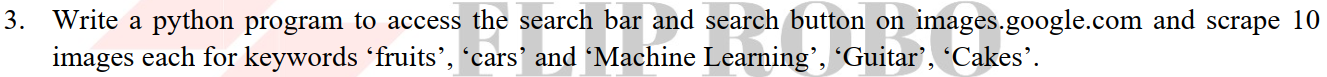

## (3) Launch Chrome web browser

In [207]:
import urllib
import requests
import io
from PIL import Image

In [215]:
driver2=webdriver.Chrome()

## Opening the website "images.google.com"

In [216]:
driver2.get('https://images.google.com')
driver2.maximize_window()

In [217]:
search=driver2.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys('fruits')

In [218]:
search_icon=driver2.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search_icon.click()

In [ ]:
images=driver2.find_elements(By.XPATH,"//div[@class="fR600b islir"]")
time.sleep(1)
for i in images:
    if i.get_attribute('src') and 'http' in i.get_attribute('src')

In [214]:
image_url='https://www.wholelifecostpro.com/images/vehicles/vehicles/front_view/i10-hatch-hyi0-24.jpg'
def download_images(download_path,url,file_name):
    try:
        image_content=requests.get(url).content
        image_file=io.BytesIO(image_content)
        image=Image.open(image_file)
        file_path=download_path+file_name
    
        with open(file_path,"wb") as f:
            image.save(f,'JPEG')
            print('Success')
    except Exception as e:
        print("FAILED: ",e)
            
        
download_images('F:\\FlipRobo\\',image_url,'car_new.jpg')      
    
        

Success


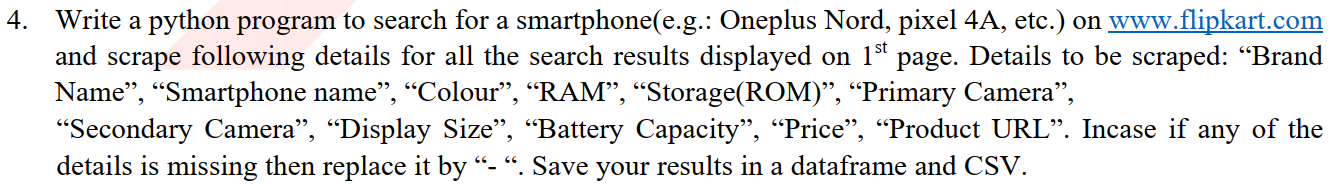

In [219]:
driver3=webdriver.Chrome()

In [222]:
driver3.get('https://www.flipkart.com')
driver3.maximize_window()

In [223]:
search3=driver3.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input')
search3.send_keys("smartphone")

In [226]:
serach_icon3=driver3.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/button')
serach_icon3.click()

In [227]:
B_Name=driver3.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
Brand=[]
for i in B_Name:
    Brand.append(i.text)
Brand
    
    

['POCO C51 (Royal Blue, 64 GB)',
 'POCO C51 - Locked with Airtel Prepaid (Royal Blue, 64 GB)',
 'vivo T2x 5G (Aurora Gold, 128 GB)',
 'vivo T2x 5G (Aurora Gold, 128 GB)',
 'vivo T2x 5G (Marine Blue, 128 GB)',
 'vivo T2x 5G (Marine Blue, 128 GB)',
 'vivo T2x 5G (Aurora Gold, 128 GB)',
 'vivo T2x 5G (Glimmer Black, 128 GB)',
 'vivo T2x 5G (Glimmer Black, 128 GB)',
 'vivo T2x 5G (Glimmer Black, 128 GB)',
 'vivo T2x 5G (Marine Blue, 128 GB)',
 'Motorola G34 5G (Ocean Green, 128 GB)',
 'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)',
 'POCO C51 (Power Black, 64 GB)',
 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128 GB)',
 'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB)',
 'Motorola G34 5G (Ocean Green, 128 GB)',
 'POCO C55 (Forest Green, 64 GB)',
 'POCO C55 (Cool Blue, 128 GB)',
 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256 GB)',
 'POCO C51 - Locked with Airtel Prepaid (Power Black, 64 GB)',
 'Motorola g54 5G (Pearl Blue, 128 GB)',
 'POCO C55 (Power Black, 64 GB)',
 'Motorola G34 5G (

In [228]:
len(Brand)

24

In [257]:
Brand_only=[]
for i in Brand:
    model=i.split()
    Brand_only.append(model[0])
Model
  
Brand_only

['POCO',
 'POCO',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'Motorola',
 'OnePlus',
 'POCO',
 'OnePlus',
 'OnePlus',
 'Motorola',
 'POCO',
 'POCO',
 'OnePlus',
 'POCO',
 'Motorola',
 'POCO',
 'Motorola']

In [236]:
len(Brand_only)

24

In [325]:
Model=[]
for i in Brand:
    model=i.split()
    Model.append(model[1])
Model

['C51',
 'C51',
 'T2x',
 'T2x',
 'T2x',
 'T2x',
 'T2x',
 'T2x',
 'T2x',
 'T2x',
 'T2x',
 'G34',
 'Nord',
 'C51',
 'Nord',
 'Nord',
 'G34',
 'C55',
 'C55',
 'Nord',
 'C51',
 'g54',
 'C55',
 'G34']

In [318]:
Colour=[]
for i in Brand:
    model=i.split()
    Colour.append(model[3])
Colour

['Blue,',
 'Locked',
 '(Aurora',
 '(Aurora',
 '(Marine',
 '(Marine',
 '(Aurora',
 '(Glimmer',
 '(Glimmer',
 '(Glimmer',
 '(Marine',
 '(Ocean',
 '3',
 'Black,',
 '3',
 '3',
 '(Ocean',
 'Green,',
 'Blue,',
 '3',
 'Locked',
 '(Pearl',
 'Black,',
 '(Ice']

In [306]:
Battery=[]
battery=driver3.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]/li[4]')
for i in battery:
    Battery.append(i.text)
Battery

['5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery']

In [307]:
Display=[]
display=driver3.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]/li[2]')
for i in display:
    Display.append(i.text)
Display

['16.56 cm (6.52 inch) HD+ Display',
 '16.56 cm (6.52 inch) HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '17.07 cm (6.72 inch) Display',
 '16.56 cm (6.52 inch) HD+ Display',
 '17.07 cm (6.72 inch) Display',
 '17.07 cm (6.72 inch) Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '17.04 cm (6.71 inch) HD+ Display',
 '17.04 cm (6.71 inch) HD+ Display',
 '17.07 cm (6.72 inch) Display',
 '16.56 cm (6.52 inch) HD+ Display',
 '16.51 cm (6.5 inch) Full HD+ Display',
 '17.04 cm (6.71 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display']

In [308]:
Camera=[]
camera=driver3.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]/li[3]')
for i in camera:
    Camera.append(i.text)
Camera

['8MP Dual Rear Camera | 5MP Front Camera',
 '8MP Dual Rear Camera | 5MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 16MP Front Camera',
 '108MP Rear Camera',
 '8MP Dual Rear Camera | 5MP Front Camera',
 '108MP Rear Camera',
 '108MP Rear Camera',
 '50MP + 2MP | 16MP Front Camera',
 '50MP Dual Rear Camera | 5MP Front Camera',
 '50MP Dual Rear Camera | 5MP Front Camera',
 '108MP Rear Camera',
 '8MP Dual Rear Camera | 5MP Front Camera',
 '50MP (OIS) + 8MP | 16MP Front Camera',
 '50MP Dual Rear Camera | 5MP Front Camera',
 '50MP + 2MP | 16MP Front Camera']

In [310]:
Price_phone=[]
price=driver3.find_elements(By.XPATH,'//div[@class="_30jeq3 _1_WHN1"]')
for i in price:
    Price_phone.append((i.text).replace('₹',''))
Price_phone

['5,499',
 '4,999',
 '14,999',
 '11,999',
 '12,999',
 '11,999',
 '12,999',
 '12,999',
 '11,999',
 '14,999',
 '14,999',
 '11,999',
 '20,775',
 '5,499',
 '19,403',
 '19,477',
 '10,999',
 '6,299',
 '7,299',
 '20,898',
 '4,999',
 '13,999',
 '6,299',
 '10,999']

In [315]:
url=[]
URL=driver3.find_elements(By.XPATH,'//div[@class="_2QcLo-"]//img[1]')
for i in URL:
    url.append(i.get_attribute('src'))
url

['https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/6/v/0/c51-mzb0dxkin-poco-original-imagzdpycgrcdc8z.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/9/i/h/-original-imagt4tdvvhyag9j.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/c/s/x/-original-imagzjhwaaewgj8r.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/c/s/x/-original-imagzjhwaaewgj8r.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/k/u/n/-original-imagzjhwtfthcmzz.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/k/u/n/-original-imagzjhwtfthcmzz.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/c/s/x/-original-imagzjhwaaewgj8r.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/4/h/e/-original-imagzjhwmsamexfk.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/4/h/e/-original-imagzjhwmsamexfk.jpeg?q=70',
 'https://rukminim2.flixcart.com/imag

In [321]:
RAM_ROM=[]
ram=driver3.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]/li[1]')
for i in ram:
    RAM_ROM.append(i.text)
RAM_ROM
    

['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '8 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 256 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB',
 '8 GB RAM | 256 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 128 GB ROM']

In [334]:
smartphone=pd.DataFrame({'Brand Name':Brand_only,'Smartphone name':Model, 'Color':Colour , 'RAM/ROM':RAM_ROM, 'Camera':Camera ,'Display Size':Display,'Battery Capacity':Battery,'Price (₹)':Price_phone,'url':url})
smartphone

,Brand Name,Smartphone name,Color,RAM/ROM,Camera,Display Size,Battery Capacity,Price (₹),url
0,POCO,C51,"Blue,",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,8MP Dual Rear Camera | 5MP Front Camera,16.56 cm (6.52 inch) HD+ Display,5000 mAh Battery,"5,499",https://rukminim2.flixcart.com/image/312/312/x...
1,POCO,C51,Locked,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,8MP Dual Rear Camera | 5MP Front Camera,16.56 cm (6.52 inch) HD+ Display,5000 mAh Battery,"4,999",https://rukminim2.flixcart.com/image/312/312/x...
2,vivo,T2x,(Aurora,8 GB RAM | 128 GB ROM,50MP + 2MP | 8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"14,999",https://rukminim2.flixcart.com/image/312/312/x...
3,vivo,T2x,(Aurora,4 GB RAM | 128 GB ROM,50MP + 2MP | 8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"11,999",https://rukminim2.flixcart.com/image/312/312/x...
4,vivo,T2x,(Marine,6 GB RAM | 128 GB ROM,50MP + 2MP | 8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"12,999",https://rukminim2.flixcart.com/image/312/312/x...
5,vivo,T2x,(Marine,4 GB RAM | 128 GB ROM,50MP + 2MP | 8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"11,999",https://rukminim2.flixcart.com/image/312/312/x...
6,vivo,T2x,(Aurora,6 GB RAM | 128 GB ROM,50MP + 2MP | 8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"12,999",https://rukminim2.flixcart.com/image/312/312/x...
7,vivo,T2x,(Glimmer,6 GB RAM | 128 GB ROM,50MP + 2MP | 8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"12,999",https://rukminim2.flixcart.com/image/312/312/x...
8,vivo,T2x,(Glimmer,4 GB RAM | 128 GB ROM,50MP + 2MP | 8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"11,999",https://rukminim2.flixcart.com/image/312/312/x...
9,vivo,T2x,(Glimmer,8 GB RAM | 128 GB ROM,50MP + 2MP | 8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"14,999",https://rukminim2.flixcart.com/image/312/312/x...


In [331]:
len(Battery)

24

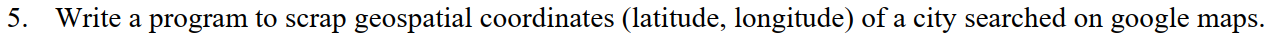

## (5) Launching chrome browser

In [394]:
driver4=webdriver.Chrome()

## Opening the google maps

In [395]:
driver4.get('https://maps.google.com')
driver4.maximize_window()

## Extracting the geospatial coordinates of location "INDIA GATE, NEW DELHI, INDIA"

In [396]:
search4=driver4.find_element(By.XPATH,"/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input")
search4.send_keys('India Gate, New Delhi, India')
search4_icon=driver4.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button/span')
search4_icon.click()
time.sleep(3)
url = driver4.current_url
coordinates = url.split("@")[1].split(",")[0:2]

print('Latitude :',coordinates[0],','' Longitude :',coordinates[1])

Latitude : 28.6129167 , Longitude : 77.2269348


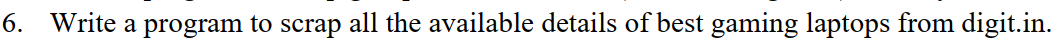

## (6) Launch Chrome browser

In [535]:
driver5=webdriver.Chrome()
driver5.maximize_window()

In [536]:
driver5.get('https://www.digit.in')

In [538]:
Brand=[]

for page in range(0,3):
    search5=driver5.find_element(By.XPATH,'/html/body/div[1]/header/div/div[2]/div/nav/ul/li[2]/a')
    search5.click()
    time.sleep(5)
    j=['/html/body/div[1]/header/div/div[2]/div/nav/ul/li[2]/ul/li[3]/ul/li[1]/a','/html/body/div[1]/header/div/div[2]/div/nav/ul/li[2]/ul/li[3]/ul/li[2]/a','/html/body/div[1]/header/div/div[2]/div/nav/ul/li[2]/ul/li[3]/ul/li[3]/a']
    best2=search5.find_element(By.XPATH,j[page])
    best2.click()
    time.sleep(5)
    Product_brand=driver5.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]')
    time.sleep(3)
    for i in Product_brand:
        
        Brand.append(i.text)
Brand


['HP OMEN 15-en1037AX 5th Gen Ryzen 7-5800H (2021)',
 'Acer Nitro 5 AN515-45-R3TC Ryzen 5-5600H (2021)',
 'Dell New G15-5515 D560730WIN9W Ryzen 7-5800H',
 'Lenovo Ideapad Gaming 3 82K200X2IN Ryzen 7-5800H (2022)',
 'HP Victus 16-e0362ax 5th Gen Ryzen 7-5800H (2022)',
 'Acer Nitro 5 AN515-45-R3TC Ryzen 5-5600H (2021)',
 'Dell New G15-5515 D560804WIN9W Ryzen 5-5600H (2022)',
 'HP Pavilion Gaming 15-EC2048AX Ryzen 5-5600X',
 'Lenovo Ideapad Gaming 3 82K201RRIN AMD Ryzen 5-5600H (2022)']

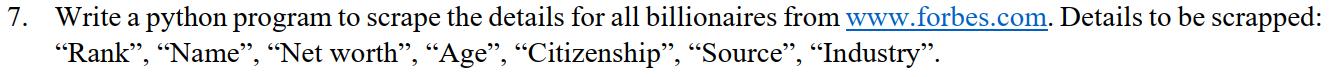

In [601]:
driver6=webdriver.Chrome()
driver6.maximize_window()

In [602]:
driver6.get('https://www.forbes.com')

In [603]:
menu=driver6.find_element(By.XPATH,'//div[@class="_8FT-x3t4"]')
menu.click()

In [606]:
bill=menu.find_element(By.XPATH,'//div[@class="xMDGnUGv lXvj00YF pgYJ2orL"]/ul[1]/li[2]')
bill.click()
world=bill.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]/a')
world.click()
time.sleep(3)

In [611]:
Billion=[]
start=0
end=13
for page in range(start,end):
    billion=driver6.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"]')
    for i in billion:
        Billion.append(i.text)
    next=driver6.find_element(By.XPATH,'//span[@class="Pagination_bubbleArrow__WFrX4 Pagination_paginationBtnNext__IOwqm"]')
    next.click()
    time.sleep(10)
Billion
    

['1',
 'Bernard Arnault & family',
 '$211 B',
 '74',
 'France',
 'LVMH',
 'Fashion & Retail',
 '2',
 'Elon Musk',
 '$180 B',
 '51',
 'United States',
 'Tesla, SpaceX',
 'Automotive',
 '3',
 'Jeff Bezos',
 '$114 B',
 '59',
 'United States',
 'Amazon',
 'Technology',
 '4',
 'Larry Ellison',
 '$107 B',
 '78',
 'United States',
 'Oracle',
 'Technology',
 '5',
 'Warren Buffett',
 '$106 B',
 '92',
 'United States',
 'Berkshire Hathaway',
 'Finance & Investments',
 '6',
 'Bill Gates',
 '$104 B',
 '67',
 'United States',
 'Microsoft',
 'Technology',
 '7',
 'Michael Bloomberg',
 '$94.5 B',
 '81',
 'United States',
 'Bloomberg LP',
 'Media & Entertainment',
 '8',
 'Carlos Slim Helu & family',
 '$93 B',
 '83',
 'Mexico',
 'Telecom',
 'Telecom',
 '9',
 'Mukesh Ambani',
 '$83.4 B',
 '65',
 'India',
 'Diversified',
 'Diversified',
 '10',
 'Steve Ballmer',
 '$80.7 B',
 '67',
 'United States',
 'Microsoft',
 'Technology',
 '11',
 'Francoise Bettencourt Meyers & family',
 '$80.5 B',
 '69',
 'France',
 

In [622]:
Billion1=Billion[0::7]
Billion1

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '31',
 '33',
 '34',
 '35',
 '35',
 '37',
 '38',
 '39',
 '40',
 '41',
 '41',
 '43',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '65',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '72',
 '74',
 '74',
 '76',
 '77',
 '77',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '84',
 '86',
 '86',
 '88',
 '89',
 '89',
 '89',
 '92',
 '93',
 '94',
 '94',
 '94',
 '97',
 '97',
 '99',
 '100',
 '101',
 '101',
 '103',
 '104',
 '104',
 '106',
 '107',
 '108',
 '108',
 '108',
 '108',
 '112',
 '113',
 '114',
 '115',
 '116',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '124',
 '126',
 '127',
 '128',
 '128',
 '130',
 '130',
 '130',
 '133',
 '133',
 '133',
 '136',
 '137',
 '138',
 '13

In [623]:
len(Billion1)

2600

In [624]:
Billion2=Billion[1::7]
Billion2

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Mukesh Ambani',
 'Steve Ballmer',
 'Francoise Bettencourt Meyers & family',
 'Larry Page',
 'Amancio Ortega',
 'Sergey Brin',
 'Zhong Shanshan',
 'Mark Zuckerberg',
 'Charles Koch & family',
 'Julia Koch & family',
 'Jim Walton',
 'Rob Walton & family',
 'Alice Walton',
 'David Thomson & family',
 'Michael Dell',
 'Gautam Adani',
 'Phil Knight & family',
 'Zhang Yiming',
 'Dieter Schwarz',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Giovanni Ferrero',
 'Jacqueline Mars',
 'John Mars',
 'Li Ka-shing',
 'Ma Huateng',
 'Miriam Adelson & family',
 'Ken Griffin',
 'Mark Mateschitz',
 'Robin Zeng',
 'Tadashi Yanai & family',
 'Len Blavatnik',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Gianluigi Aponte',
 'Rafaela Aponte-Diamant',
 'Colin Huang',
 'Reinhold Wuerth & family',
 'Lee Shau Kee',
 'Jeff Yass',
 'Jim Simon

In [625]:
len(Billion2)

2600

In [627]:
Billionaires=pd.DataFrame({"Rank":Billion[0::7], "Name":Billion[1::7], "Net worth":Billion[2::7], "Age":Billion[3::7], "Citizenship":Billion[4::7], "Source":Billion[5::7], "Industry":Billion[6::7]})
Billionaires

,Rank,Name,Net worth,Age,Citizenship,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2540,Lev Kvetnoi,$1 B,57,Russia,Cement,Finance & Investments
2596,2540,Michiel Le Roux,$1 B,73,South Africa,Banking,Finance & Investments
2597,2540,Li Wanqiang,$1 B,45,China,Smartphones,Technology
2598,2540,Liu Baolin,$1 B,69,China,Pharmacies,Fashion & Retail


In [554]:
driver6.close()

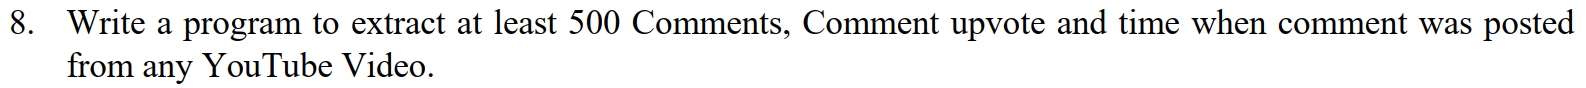

## (8) Launching the Chrome browser

In [650]:
driver7=webdriver.Chrome()

In [651]:
driver7.get('https://www.youtube.com')

In [653]:
cricket=driver7.find_element(By.XPATH,"/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-section-renderer[2]/div/ytd-rich-shelf-renderer/div[1]/div[2]/ytd-rich-item-renderer[2]/div/ytd-rich-grid-media/div[1]/div[3]/div[1]/h3/a/yt-formatted-string")
cricket.click()

In [656]:
COMMENTS1=[]
comment=driver7.find_elements(By.ID,"comment-content")
for i in comment:
    COMMENTS1.append(i.text)
COMMENTS1

['Beautiful ground, Beautiful pich... Beautiful people, Beautiful Highlights, Beautiful bat sound... Everything is good in Australia... Love from India...',
 'A strong West Indies side is a boon for the game of Cricket!! \n\nThey add the Calypso flavour to cricket ',
 'Never Rule out Windies in T20s they have the Power and Ability to win match out of no where . Great Fightback .',
 'Be it any format Warner bats with the same Attacking intent . Power Hitting at its best from Davey .',
 'Tim David Cameo Innings was the match turning point for Aussie team',
 'DAVID WARNER became the first player to score 50+ scores in his 100th match in all formats  ',
 'This West Indies team is something else . Hope we will see old WI in world cup',
 'For a second I thought, it’s some 5 years old Highlight video \n-Warner opening in T20i\n-Russ with opening bowling\nRead more',
 'Cracking game. This World Cup is going to be something special.',
 'AUssies r ready for the upcoming T20 world cup 2024, their

In [657]:
len(COMMENTS1)

506

In [661]:
POST_TIME=[]
post_time=driver7.find_elements(By.XPATH,'//yt-formatted-string[@class="published-time-text style-scope ytd-comment-renderer"]')
for i in post_time:
    POST_TIME.append(i.text)
POST_TIME
    

['19 hours ago',
 '20 hours ago',
 '20 hours ago',
 '20 hours ago',
 '20 hours ago',
 '18 hours ago',
 '20 hours ago',
 '20 hours ago',
 '20 hours ago',
 '20 hours ago',
 '20 hours ago',
 '20 hours ago',
 '19 hours ago',
 '19 hours ago',
 '20 hours ago',
 '20 hours ago',
 '20 hours ago',
 '20 hours ago',
 '20 hours ago',
 '20 hours ago',
 '19 hours ago (edited)',
 '20 hours ago',
 '20 hours ago',
 '17 hours ago',
 '20 hours ago',
 '19 hours ago',
 '20 hours ago (edited)',
 '20 hours ago',
 '20 hours ago',
 '19 hours ago',
 '19 hours ago',
 '18 hours ago',
 '20 hours ago',
 '19 hours ago',
 '19 hours ago',
 '20 hours ago (edited)',
 '17 hours ago',
 '20 hours ago',
 '20 hours ago (edited)',
 '20 hours ago',
 '19 hours ago',
 '19 hours ago',
 '19 hours ago',
 '20 hours ago',
 '20 hours ago',
 '12 hours ago (edited)',
 '9 hours ago',
 '9 hours ago',
 '14 hours ago',
 '16 hours ago',
 '16 hours ago',
 '19 hours ago',
 '16 hours ago',
 '16 hours ago',
 '20 hours ago',
 '6 hours ago',
 '20 h

In [662]:
len(POST_TIME)

506

In [663]:
youtube=pd.DataFrame({"Comment upvote":COMMENTS1,"Time":POST_TIME})
youtube

,Comment upvote,Time
0,"Beautiful ground, Beautiful pich... Beautiful ...",19 hours ago
1,A strong West Indies side is a boon for the ga...,20 hours ago
2,Never Rule out Windies in T20s they have the P...,20 hours ago
3,Be it any format Warner bats with the same Att...,20 hours ago
4,Tim David Cameo Innings was the match turning ...,20 hours ago
...,...,...
501,Brainless Cricket from west Windies,19 hours ago
502,Mark Howard ruined cricket for me worst ever,8 hours ago
503,The most disgusting version of cricket to watc...,8 hours ago
504,T20 is a terrible platform . \nIts as boring a...,8 hours ago


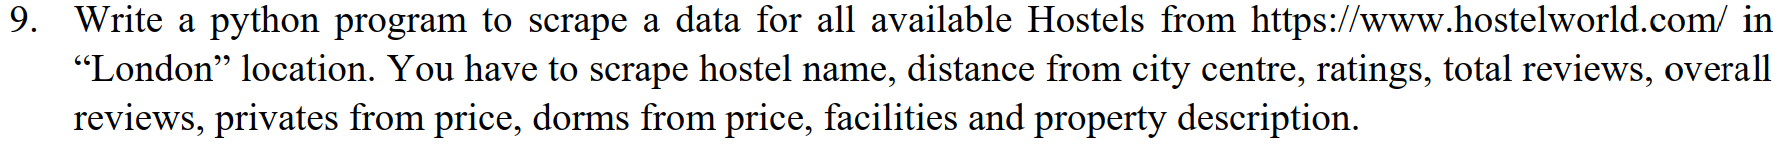

## (9) Launching the website

In [828]:
driver8=webdriver.Chrome()
driver8.maximize_window()
driver8.get('https://www.hostelworld.com')

In [829]:
search=driver8.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]')

search.click()
time.sleep(10)

In [830]:
location=driver8.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input')
location.send_keys('London,England')

In [831]:
select=driver8.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button/div[2]')
select.click()
time.sleep(10)

In [832]:
icon=driver8.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[2]/div')
icon.click()
time.sleep(10)


In [836]:
Name10=[]
name=driver8.find_elements(By.XPATH,'//div[@class="property-name"]/span')
for i in name:
    Name10.append(i.text)
Name10

["Wombat's City Hostel London",
 'Palmers Lodge - Swiss Cottage',
 "St Christopher's Village",
 'NX London Hostel',
 'Urbany Hostel London',
 'Onefam Notting Hill',
 'Generator London',
 'Onefam Waterloo',
 'Astor Hyde Park',
 'Safestay London Elephant & Castle',
 'Astor Museum Inn',
 'No.8 Seven Sisters',
 'No.8 Willesden Hostel London',
 'Clink261',
 'Smart Russell Square Hostel',
 'Safestay London Kensington Holland Park',
 'Smart Hyde Park Inn Hostel',
 'Destinations Hostels @ The Gallery',
 'Queen Elizabeth Chelsea',
 'Hostelle - women only hostel London',
 'Prime Backpackers Angel',
 'Kabannas London St Pancras',
 'London Backpackers',
 'Astor Kensington',
 "St Christopher's Hammersmith",
 'Astor Victoria',
 'Phoenix Hostel',
 "St Christopher's Camden",
 "St Christopher's Shepherds Bush",
 'YHA London St Pauls']

In [837]:
len(Name10)

30

In [841]:
next=driver8.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[5]/div/button[2]')


In [842]:
next.click()
time.sleep(10)

In [843]:
name=driver8.find_elements(By.XPATH,'//div[@class="property-name"]/span')
for i in name:
    Name10.append(i.text)
Name10


["Wombat's City Hostel London",
 'Palmers Lodge - Swiss Cottage',
 "St Christopher's Village",
 'NX London Hostel',
 'Urbany Hostel London',
 'Onefam Notting Hill',
 'Generator London',
 'Onefam Waterloo',
 'Astor Hyde Park',
 'Safestay London Elephant & Castle',
 'Astor Museum Inn',
 'No.8 Seven Sisters',
 'No.8 Willesden Hostel London',
 'Clink261',
 'Smart Russell Square Hostel',
 'Safestay London Kensington Holland Park',
 'Smart Hyde Park Inn Hostel',
 'Destinations Hostels @ The Gallery',
 'Queen Elizabeth Chelsea',
 'Hostelle - women only hostel London',
 'Prime Backpackers Angel',
 'Kabannas London St Pancras',
 'London Backpackers',
 'Astor Kensington',
 "St Christopher's Hammersmith",
 'Astor Victoria',
 'Phoenix Hostel',
 "St Christopher's Camden",
 "St Christopher's Shepherds Bush",
 'YHA London St Pauls',
 'PubLove @ The Rose & Crown',
 'Park Villa',
 'PubLove @ The White Ferry, Victoria',
 "St Christopher's Greenwich",
 'Bell House Hostel',
 'Saint James Backpackers',
 'P

In [849]:
len(Name10)

70